In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 
from sklearn import tree

In [2]:
data = pd.read_csv('DataSet/titanic.csv')

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data = data.fillna(method='bfill')

In [6]:
target = data.Survived

In [7]:
target.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [8]:
inputs = data[['Pclass','Sex','Age','Fare']]

In [9]:
inputs.tail(2)

,Pclass,Sex,Age,Fare
889,1,male,26.0,30.00
890,3,male,32.0,7.75


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le_gender = LabelEncoder()

In [12]:
inputs['Sex_n'] = le_gender.fit_transform(inputs['Sex'])

C:\Users\KAUSHA~1\AppData\Local\Temp/ipykernel_14184/4062041848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex_n'] = le_gender.fit_transform(inputs['Sex'])


In [13]:
inputs = inputs.drop(['Sex'],axis=1)
inputs.tail(3)

,Pclass,Age,Fare,Sex_n
888,3,26.0,23.45,0
889,1,26.0,30.00,1
890,3,32.0,7.75,1


In [14]:
inputs.isna().sum()


Pclass    0
Age       0
Fare      0
Sex_n     0
dtype: int64

In [15]:
# inputs = inputs.fillna(method='ffill')

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(inputs,target,test_size=.2,random_state=42)

In [29]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_n'], dtype='object')

In [21]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [22]:
model.score(X_test,Y_test)

0.7932960893854749

In [23]:
prediction = model.predict(X_test)
prediction

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(Y_test,prediction)

In [26]:
print(cm)

[[86 19]
 [18 56]]


In [27]:
import seaborn as sns

<AxesSubplot:>

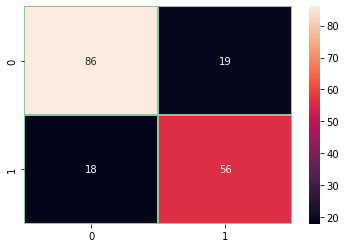

In [28]:
sns.heatmap(cm,annot=True,linecolor='#87c7a3',lw=2)

In [34]:
tree.export_graphviz(model,out_file = 'titanic.dot',
                        feature_names = ['Pclass', 'Age', 'Fare', 'Sex_n'],
#                         class_names = target,
                        label='all',
                        rounded=True,
                        filled=True)